In [1]:
#standard imports 
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

This is based on some piece of code found in the Internet.
The idea is the following: sample() function returns uniformly distributed set of N points. Each point is defined by p features (coordinates) defined as argument dimensions in the range 0,1 each.

findOutliers methods get the list of points and returns the average number of points that are 'outliers' where by outlier we understand a point for which any of coordinates x has value smaller than 0.01 or larger than 0.99.

Finally, drawOutliersFraction() function gets range of dimensions and for every dimension it generates N points and calculates the mean value of outliers

In [2]:
def sample(dimensions=2, N=1000):
    return [[random.uniform(0., 1.) for i in range(dimensions)] for _ in range(N)]

def findOutliers(points):
    return np.mean([any([(x < .01 or x > .99) for x in p]) for p in points])

def drawOutliersFraction(dimensions=range(1,200)):
    plt.plot(dimensions, [findOutliers(sample(d)) for d in dimensions])
    plt.xlabel('dimensions')
    plt.ylabel('fraction of outliers')

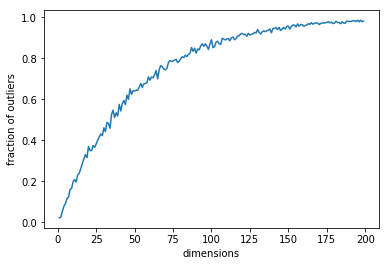

In [3]:
drawOutliersFraction()

As one can see for higher dimensions practically all data point lay in the borders!!

We can also calculate the closest and the mean distance between the points in different  dimensions .
We will use Euclidean distance.

In [4]:
def generatePoint(dimensions=2):
    return [random.uniform(0., 1.) for i in range(dimensions)]

In [5]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.square(np.array(p1)-np.array(p2))))

In [6]:
def distances(dimensions, ntrials=10000):
    return [distance(p1,p2) for p1,p2 in [(generatePoint(dimensions), generatePoint(dimensions)) for _ in range(ntrials)]]

In [7]:
def drawMeanMinDistances(dimensions=range(1,200)):
    dists = [distances(d) for d in dimensions]
    plt.plot(dimensions,[np.mean(dist) for dist in dists],'r')
    plt.plot(dimensions,[np.min(dist) for dist in dists],'g')
    plt.xlabel('dimensions')
    plt.show()

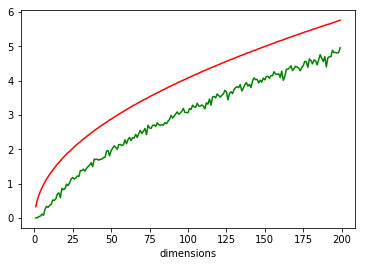

In [8]:
drawMeanMinDistances()

In [11]:
def drawRatio(dimensions=range(1,200)):
    dists = [distances(d) for d in dimensions]
    means = [np.mean(dist) for dist in dists]
    closest = [np.min(dist) for dist in dists]
    plt.plot(dimensions,[c/m  for c,m in zip(closest,means)],'g')
    plt.xlabel('dimensions')
    plt.ylabel('ratio between closest and mean distances')
    plt.show()

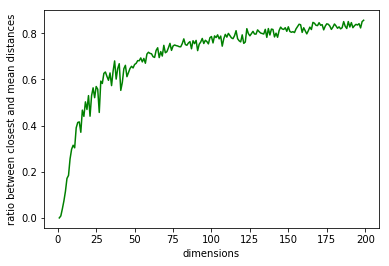

In [12]:
drawRatio()